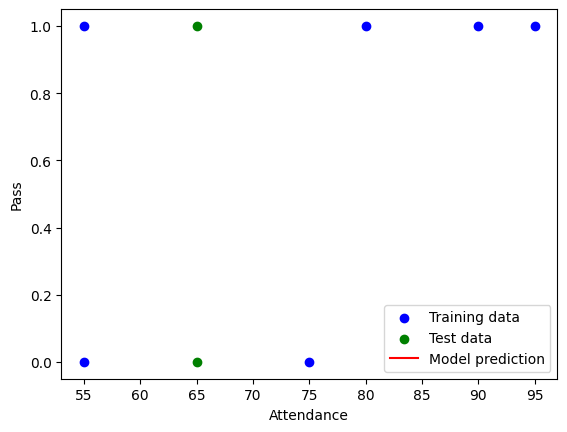

Costo en el conjunto de entrenamiento: 0.09088797849712887
Costo en el conjunto de prueba: 0.1291106124070414


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Datos (Attendance, Homework, Pass (1 para yes, 0 para no))
data = np.array([
    [80, 75, 1],
    [65, 90, 1],
    [55, 80, 1],
    [95, 105, 1],
    [55, 65, 0],
    [75, 55, 0],
    [90, 70, 1],
    [65, 80, 0]
])

# Dividir los datos en conjunto de entrenamiento y de prueba
np.random.shuffle(data)
train_data = data[:6]
test_data = data[6:]

# Función para la hipótesis
def hypothesis(theta0, theta1, x):
    return theta0 + theta1 * x

# Función de costo
def cost_function(theta0, theta1, data):
    m = len(data)
    total_cost = 0
    for i in range(m):
        x = data[i][0]  # Usamos Attendance
        y = data[i][2]  # Usamos Pass
        total_cost += (hypothesis(theta0, theta1, x) - y) ** 2
    return total_cost / (2 * m)

# Descenso de gradiente
def gradient_descent(data, theta0, theta1, alpha, iterations):
    m = len(data)
    for _ in range(iterations):
        sum_theta0 = 0
        sum_theta1 = 0
        for i in range(m):
            x = data[i][0]  # Usamos Attendance
            y = data[i][2]  # Usamos Pass
            sum_theta0 += (hypothesis(theta0, theta1, x) - y)
            sum_theta1 += (hypothesis(theta0, theta1, x) - y) * x
        theta0 -= alpha * sum_theta0 / m
        theta1 -= alpha * sum_theta1 / m
    return theta0, theta1

# Inicialización de parámetros
theta0_initial = 0
theta1_initial = 0
alpha = 0.0001
iterations = 1000

# Entrenar el modelo
theta0_trained, theta1_trained = gradient_descent(train_data, theta0_initial, theta1_initial, alpha, iterations)

# Predicción para el conjunto de prueba
test_predictions = []
for i in range(len(test_data)):
    x = test_data[i][0]  # Usamos Attendance
    test_predictions.append(hypothesis(theta0_trained, theta1_trained, x))

# Visualización de resultados
plt.scatter(train_data[:, 0], train_data[:, 2], color='blue', label='Training data')
plt.scatter(test_data[:, 0], test_data[:, 2], color='green', label='Test data')
plt.plot(test_data[:, 0], test_predictions, color='red', label='Model prediction')
plt.xlabel('Attendance')
plt.ylabel('Pass')
plt.legend()
plt.show()

# Calcular la función de costo para el conjunto de entrenamiento y de prueba
train_cost = cost_function(theta0_trained, theta1_trained, train_data)
test_cost = cost_function(theta0_trained, theta1_trained, test_data)

print(f'Costo en el conjunto de entrenamiento: {train_cost}')
print(f'Costo en el conjunto de prueba: {test_cost}')


In [13]:
#/Portafolio.ipynb

%%shell
jupyter nbconvert --to html /Portafolio.ipynb

[NbConvertApp] Converting notebook /Portafolio.ipynb to html
[NbConvertApp] Writing 622519 bytes to /Portafolio.html
